In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import sys

In [4]:
datas_train = pd.read_csv("datasets/dataset_train.csv")
datas_train.head()
datas_train.shape

# Clean dataset
temp = datas_train
temp['Divination'].replace("", float("NaN"), inplace=True)
temp['Arithmancy'].replace("", float("NaN"), inplace=True)
temp.dropna(inplace=True)
temp = datas_train.reset_index(drop=True)
temp.drop('Index', axis=1, inplace=True)
datas_train = temp
datas_train.head()

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69


In [5]:
print("Count : " + str(len(datas_train['Divination'])))

Count : 1251


In [6]:
# Recreate sum function
def mysum(data):
    total = 0
    for i in range(0, len(data)):
        total += data[i]
    return total

print(mysum(datas_train['Divination']))

4020.5019999999986


In [7]:
# Recreate mean function
def mymean(data):
    return mysum(data) / len(data)


print(mymean(datas_train['Divination']))

3.2138305355715415


In [8]:
# Recreate variance function
def myvariance(data):
    mean = mymean(data)
    deviations = [math.pow((x - mean), 2) for x in data]
    return mysum(deviations) / len(data)
    
print(myvariance(datas_train['Divination']))
print(statistics.pvariance(datas_train['Divination']))

16.886742265446422
16.886742265446475


In [9]:
# Recreate standard deviation function
def mystd(data):
    return math.sqrt(myvariance(data))
    
print(mystd(datas_train['Divination']))
print(np.std(datas_train['Divination']))

4.109348155784129
4.109348155784136


In [10]:
# Recreate min function
def mymin(data):
    min = sys.maxsize
    for i in range(0, len(data)):
            if min > data[i]:
                min = data[i]
    return min

print(mymin(datas_train['Divination']))
print(np.min(datas_train['Divination']))

-8.727
-8.727


In [11]:
# Recreate max function
def mymax(data):
    max = -sys.maxsize
    for i in range(0, len(data)):
        if max < data[i]:
            max = data[i]
    return max
    
print(mymax(datas_train['Divination']))
print(np.max(datas_train['Divination']))

10.032
10.032


In [12]:
# Recreate first quartile function
def quartile(data, coef):
    list = data.tolist()
    list.sort()
    
    pos = int(len(list) * coef)
    reste = len(list) * coef - pos
    
    if reste > 1/2 :
        return list[int(pos + (1 - reste))]
    return list[pos]

print(quartile(datas_train['Divination'], 0.75))
datas_train.head()

5.729


,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69


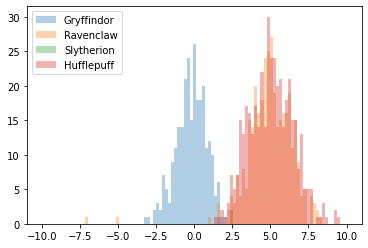

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69


In [13]:
import random


np.random.seed(42)
df = datas_train
bins = np.linspace(-10, 10, 100)
plt.hist(datas_train[df['Hogwarts House'] == 'Gryffindor']['Care of Magical Creatures'], bins, alpha=0.35, label='Gryffindor')
plt.hist(datas_train[df['Hogwarts House'] == 'Ravenclaw']['Divination'], bins, alpha=0.35, label='Ravenclaw')
plt.hist(datas_train[df['Hogwarts House'] == 'Slytherion']['Divination'], bins, alpha=0.35, label='Slytherion')
plt.hist(datas_train[df['Hogwarts House'] == 'Hufflepuff']['Divination'], bins, alpha=0.35, label='Hufflepuff')
plt.legend()
plt.show()
df.head()


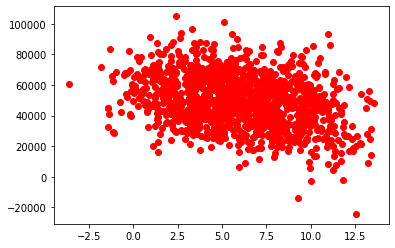

In [14]:
plt.scatter(df['Potions'], df['Arithmancy'], c='r')

In [15]:
df.head()

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [35]:
def logistic_regression(X, y, learning_rate, iterations):
    m = len(X)
    n = X.shape[0]
    
    W = np.zeros((n, 1))
    B = 0
    cost = 0
    for i in range(iterations):
        Z = W.T.dot(X)
        print(Z)
        A = sigmoid(Z)
        print(A)
        # print(type(-(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))))
        cost = -(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
        
        dW = (1 / m) * np.dot(A - y, X.T)
        dB = (1 / m) * np.sum(A - y)
        
        W = W - learning_rate * dW.T
        B = B - learning_rate * dB
        
        cost_list.append(cost)
        
    return W, B, cost_list




df = pd.read_csv("datasets/dataset_train.csv")

df.replace('', np.NaN, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
# df.drop(['Index', 'index', 'Birthday', 'Best Hand', 'Last Name', 'First Name'], axis=1, inplace=True)


# X_test = df.drop(['Hogwarts House'], axis=1).values
# X = X_test.T
# np.transpose(X)


X = df.drop(['index', 'Index', 'Hogwarts House', 'Best Hand', 'First Name', 'Last Name', 'Birthday'], axis=1).values
# print(df.head())
y_data = df['Hogwarts House'].values
print(X.shape)

y_data = y_data.reshape(y_data.shape[0], 1)       
            
print(y_data.shape)
W, B, cost_list = logistic_regression(X, y_data, 0.001, 100)

(1251, 13)
(1251, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]]


TypeError: can't multiply sequence by non-int of type 'float'